## K-Means Clustering (Sin Librerias)

Autor: José María Manzano Ortega

In [57]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
def mostrar(X, c=None, centroids=None,i=0,j=0):

    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Pintamos los puntos
    plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)

    # Pintamos los centroides si los hay
    if centroids is not None:
        plt.scatter(centroids.iloc[:,i], centroids.iloc[:,j], marker='*', c=range(centroids.shape[0]), s=500)

    # Mostramos la figura
    plt.show()

In [58]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [59]:
iris = load_iris()

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
X['class'] = iris.target

# Map the target values to their respective species names
X['class'] = X['class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
X = X.drop(columns=['class'])

In [62]:
m = X.shape[0]
n = X.shape[1]

In [63]:
print(f"Numero de filas {m}, numero de cols {n}")

Numero de filas 150, numero de cols 4


In [64]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
X_norm = (X-X.min())/(X.max()-X.min())

In [66]:
X_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


<ipython-input-57-7fcdacff073e>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)


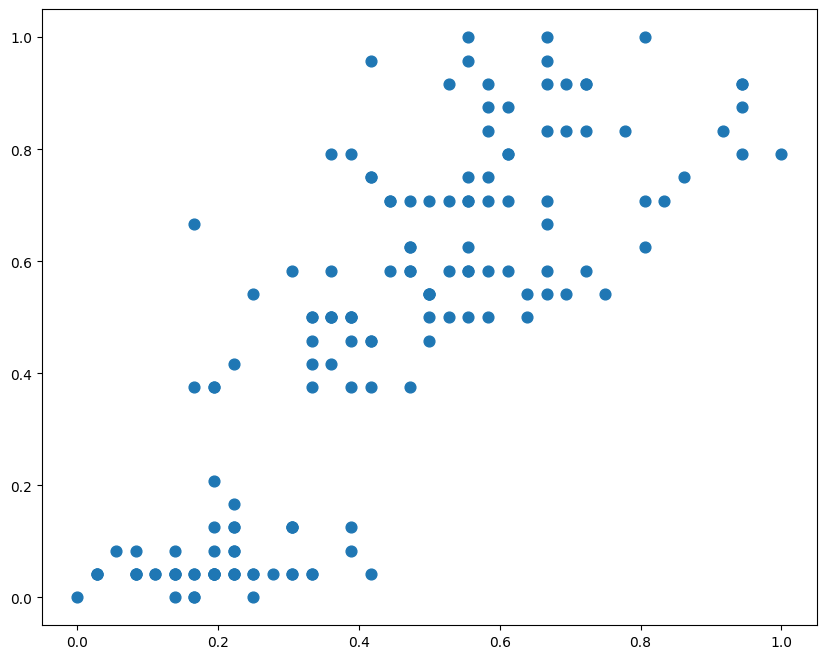

In [67]:
mostrar(X_norm, i=0, j=3)

# K-means

In [68]:
K = 3

In [69]:
np.random.seed(123456789)

In [70]:
m

150

In [71]:
indices = np.random.permutation(m)[:K]

In [72]:
centros = X_norm.iloc[indices, :]

In [73]:
centros

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,0.333333,0.166667,0.457627,0.375000
51,0.583333,0.500000,0.593220,0.583333
100,0.555556,0.541667,0.847458,1.000000


<ipython-input-57-7fcdacff073e>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)


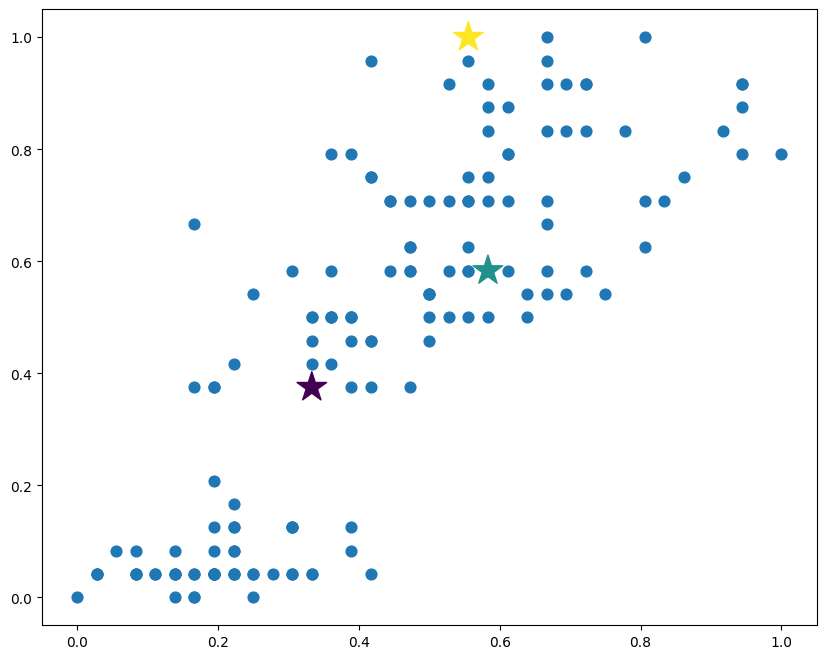

In [74]:
mostrar(X_norm, centroids=centros, i = 0, j=3)

Paso 1: calcular las distancias a esos centroides

In [75]:
distancias = np.zeros((m,K))

In [76]:
for i in range(K):
  distancias [:, i] = np.sum(np.square(X_norm - centros.iloc[i]), axis = 1)


In [77]:
distancias

array([[0.48549406, 0.71549911, 1.64432963],
       [0.35335671, 0.75002843, 1.69313365],
       [0.43707463, 0.81056495, 1.75225752],
       [0.39772106, 0.80368528, 1.73007044],
       [0.53236906, 0.74848522, 1.67230031],
       [0.56880611, 0.59752202, 1.4217942 ],
       [0.47314838, 0.78301454, 1.67287902],
       [0.44305285, 0.71012818, 1.63226951],
       [0.39984591, 0.89373985, 1.83260124],
       [0.39251273, 0.77417139, 1.7399084 ],
       [0.544326  , 0.67251244, 1.59040994],
       [0.4492186 , 0.73947533, 1.64991202],
       [0.39290147, 0.82082318, 1.79710741],
       [0.50843318, 1.01958848, 2.0140113 ],
       [0.74204611, 0.7451328 , 1.68464112],
       [0.89907137, 0.75642448, 1.58520161],
       [0.6193663 , 0.66646773, 1.52521276],
       [0.45945239, 0.67209633, 1.56620463],
       [0.54334315, 0.57553128, 1.44262754],
       [0.57673341, 0.70144763, 1.57652105],
       [0.40040334, 0.60273035, 1.51380809],
       [0.50728896, 0.64241985, 1.48624328],
       [0.

In [78]:
c = np.argmin(distancias, axis=1)

In [79]:
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1])

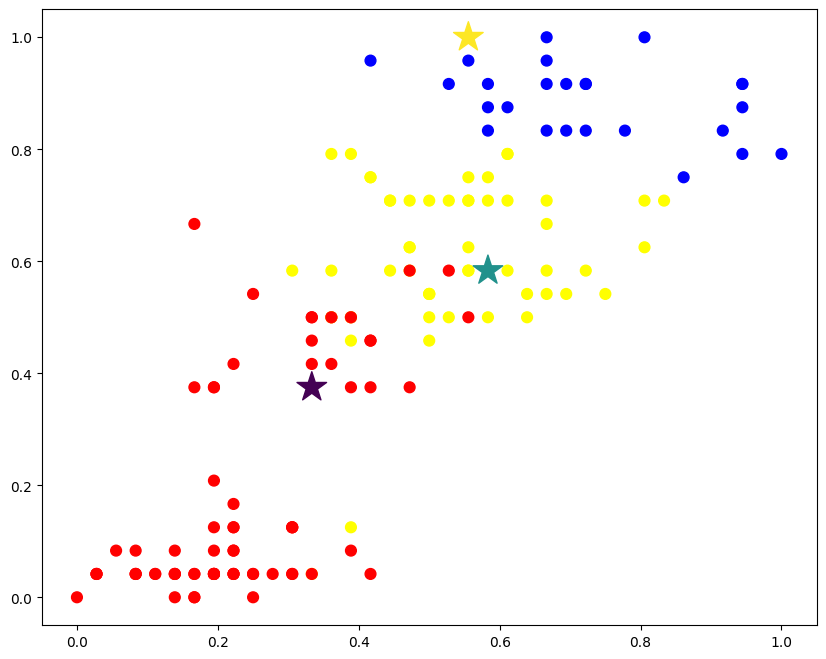

In [80]:
mostrar(X_norm, c = c, centroids = centros, i = 0, j=3)

In [81]:
new_centroids_list = []

for i in range(K):
   cluster_mean = X_norm.iloc[c == i].mean()
   new_centroids_list.append(cluster_mean)

new_centroids = pd.DataFrame(new_centroids_list, columns=X_norm.columns)

In [82]:
new_centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.242670,0.454861,0.219633,0.194444
1,0.539530,0.405449,0.634615,0.606571
2,0.722222,0.471154,0.819426,0.891026


In [89]:
def asigna(X, centroides):
    distancias = np.zeros((X.shape[0], centroides.shape[0]))
    for i in range(centroides.shape[0]):
        distancias[:, i] =  np.sqrt(np.sum(np.square(X - centroides.iloc[i]), axis=1))
    c = np.argmin(distancias, axis=1)
    return c

def actualiza(X, centroides,c, k):
    new_centroids_list = []

    for i in range(K):
      cluster_mean = X_norm.iloc[c == i].mean()
      new_centroids_list.append(cluster_mean)

    new_centroids = pd.DataFrame(new_centroids_list, columns=X_norm.columns)

    return new_centroids

In [90]:
def cambio(centros, new_centroids):
  temp_dist = 0
  for i in range(centros.shape[0]):
    temp_dist += np.sum((new_centroids.iloc[i]-centros.iloc[i])**2, axis=0)
  return temp_dist

In [91]:
cambio(centros, new_centroids)

0.23904074255907043

In [92]:
def kmeans(X, k, umbral=0.01):
  m = X.shape[0]
  n = X.shape[1]

  # Step 0: inicialización
  centros = X.iloc[np.random.permutation(m)[:k],:]

  # Bucle

  while True:

    c = asigna(X, centros)

    new_centros = actualiza(X, centros, c, k)

    diff = cambio(centros, new_centros)
    print(f"Diferencia: {diff}")

    if diff < umbral:
      break
    else:
      centros = new_centros

  return centros, c

In [93]:
centros, c = kmeans(X_norm, K)

Diferencia: 0.09788722135123219
Diferencia: 0.0003017866451079617


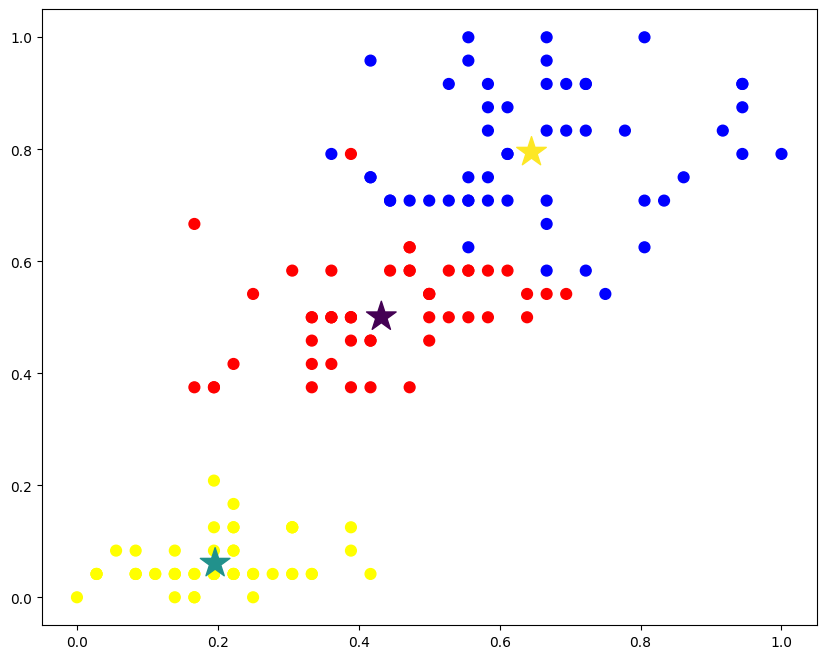

In [94]:
mostrar(X_norm, c, centros, i=0, j= 3)